In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Загрузка данных
df = pd.read_excel('regression.xlsx', sheet_name='var5')

In [ ]:
# Разделение датасета на обучающую и валидационную выборки
y = df['y']
X = df['x1']
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.25, random_state=0)
X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)




С помощью метода train_test_split() разделяются данные на обучающую и тестовую, параметр test_size указывает на размер тестовой выборки, reset_index(drop=True) сбрасывает индексы из исходного датасета.



In [ ]:
# Обучение модели и предсказание
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)
pred_x1_valid = model.predict(np.array(X_valid).reshape(-1,1))
model

LinearRegression()

Происходит обучение модели и предсказание.np.array(X_train) - преобразует данные в массив NumPy

In [ ]:
# Датафрейм
df_match_x1 = pd.DataFrame({'Actual': y_valid, 'Predicted': pred_x1_valid})
display(df_match_x1.head())

,Actual,Predicted
0,-0.563207,0.132943
1,1.357747,0.156268
2,-0.570703,0.147933
3,-0.465455,0.125775
4,0.161622,0.140831


Создается датафрейм с исходными и предсказанными значениями целевой переменной

In [ ]:
# Метрики
print(f"MAE: {metrics.mean_absolute_error(y_valid, pred_x1_valid):.4f}")
print(f"MSE: {metrics.mean_squared_error(y_valid, pred_x1_valid):.4f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_valid, pred_x1_valid)):.4f}")
print(f"R²: {metrics.r2_score(y_valid, pred_x1_valid):.4f}")

MAE: 0.7688
MSE: 0.8569
RMSE: 0.9257
R²: 0.0057


Затем высчитываются метрики качества. Код оценивает качество предсказаний линейной регрессионной модели и выводит сравнение реальных и предсказанных значений. MAE показывает среднее абсолютное отклонение предсказаний от реальных значений: 0.7 - ошибка очень высокая. MSE усредняет квадраты ошибок. RMSE квадратный корень из среднего квадрата ошибок (MSE). R² — Коэффициент детерминации: 0.005 -очень низкий. Можно сделать вывод, что модель не работает.

In [ ]:
# Коэффициенты
a1 = model.coef_[0]
b1 = model.intercept_
print(f"Коэффициенты: a = {a1:.4f}, b = {b1:.4f}")

Коэффициенты: a = 0.0252, b = 0.1269


model.coef_ - это атрибут обученной модели, который содержит: массив коэффициентов (весов) для каждого признака.
В нашем случае, так как только один признак X, coef_ будет массивом из одного элемента: [a]. Мы берем первый (и единственный) элемент этого массива.
Получаем значения a и b для того, чтобы понять как работает модель. Если a > 0, то чем больше x1, тем больше y (прямая зависимость). Если a < 0, то чем больше x1, тем меньше y (обратная зависимость). Если a ≈ 0, то x1 почти не влияет на y. В данном случае a = 0.02, что говорит о том, что x1 почти не влияет на y .

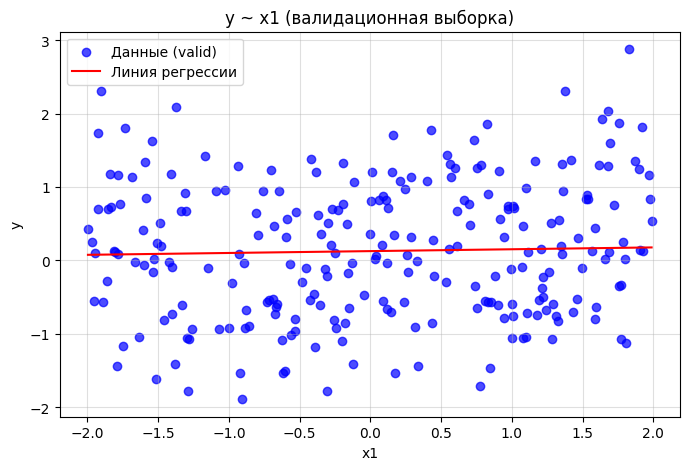

In [ ]:
# Визуализация: scatter + линия регрессии
plt.figure(figsize=(8, 5))
plt.scatter(X_valid, y_valid, color='blue', alpha=0.7, label='Данные (valid)')
x_line = np.linspace(X_valid.min(), X_valid.max())
y_line = a1 * x_line + b1
plt.plot(x_line, y_line, 'r', label='Линия регрессии')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('y ~ x1 (валидационная выборка)')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

Здесь происходит визуализация результата простой линейной регрессии: строится график, на котором показаны данные и линия, которую построила модель. На графике видно, что линия регрессии почти горизонтальная, что говорит о слабой зависимости x1 и y. Также видно, что точки разбросаны хаотично, а не сконцентрированны возле красной линии, что также говорит о том, что либо переменные независимы, либо связь нелинейная

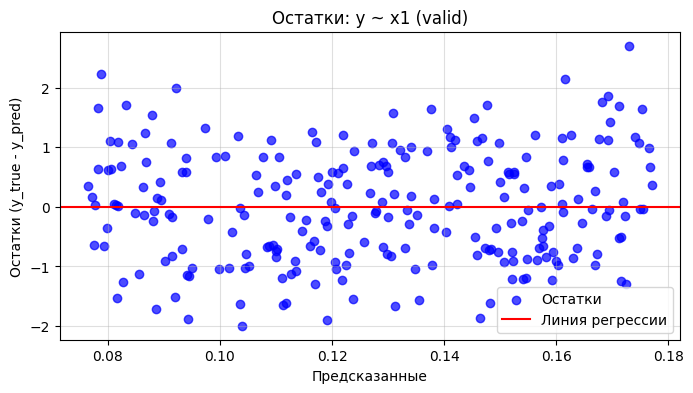

In [ ]:
# График остатков
residuals_x1 = y_valid - pred_x1_valid
plt.figure(figsize=(8, 4))
plt.scatter(pred_x1_valid, residuals_x1, alpha=0.7, label='Остатки', color='blue')
plt.axhline(0, color='red', linestyle='-',label='Линия регрессии')
plt.xlabel('Предсказанные')
plt.ylabel('Остатки (y_true - y_pred)')
plt.title('Остатки: y ~ x1 (valid)')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

Чтобы проверить, насколько хорошо линейная модель описывает данные, строится график остатков. Остатки - это разница между, исходными данными и предсказанными значениями. Если остаток близок к нулю, то модель угадала хорошо. Если остаток большой по модулю, то модель ошиблась. Здесь наблюдается, что точки разбросаны хаотично, нет скопления вокруг красной прямой, что в очередной раз подтвержает, что нет линейной зависимости

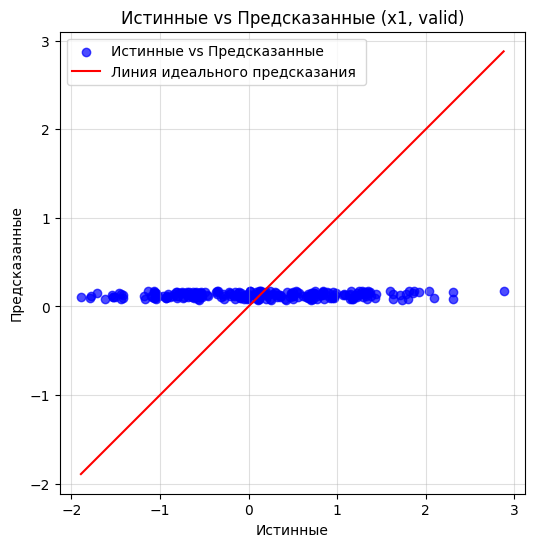

In [ ]:
# График истинные vs предсказанные
plt.figure(figsize=(6, 6))
plt.scatter(y_valid, pred_x1_valid, alpha=0.7, color='blue',label='Истинные vs Предсказанные')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r-',label='Линия идеального предсказания ')
plt.xlabel('Истинные')
plt.ylabel('Предсказанные')
plt.title('Истинные vs Предсказанные (x1, valid)')
plt.axis('equal')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

Здесь представлен график истинные и предсказанных значений. В идеальном случае, там, где есть линейная зависимость, точки бы стелились по красной линии, в нашем же случае, точки образовывают горизонтальную прямую, что говорит об отсутствии линейной зависимости

Исходя из всех графиков и оценив метрики, можно с уверенностью делать вывод, что между x1 и y нет линейной зависимости.

Теперь по аналогии выполняем действия для x2 и y

In [ ]:
X = df['x2']
y = df['y']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)
X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

С помощью метода train_test_split() разделяются данные на обучающую и тестовую, параметр test_size указывает на размер тестовой выборки, reset_index(drop=True) сбрасывает индексы из исходного датасета.

In [ ]:
model_x2 = LinearRegression()
model_x2.fit(np.array(X_train).reshape(-1, 1), y_train)
pred_x2_valid = model_x2.predict(np.array(X_valid).reshape(-1, 1))

С помощью метода predict происходит предсказание модели. Теперь модель умеет предсказывать y по новому значению x2.

In [ ]:
# Датафрейм
df_match_x2 = pd.DataFrame({'Actual': y_valid, 'Predicted': pred_x2_valid})
display(df_match_x2.head())

,Actual,Predicted
0,-0.563207,-0.568391
1,1.357747,1.283172
2,-0.570703,-0.671652
3,-0.465455,-0.494095
4,0.161622,0.482971


Создается датафрейм с истинными и предсказанными значениями. pd.DataFrame() превращает словарь в таблицу с двумя столбцами - истинным и предсказанным значением y.

In [ ]:
# Метрики
print(f"MAE: {metrics.mean_absolute_error(y_valid, pred_x2_valid):.4f}")
print(f"MSE: {metrics.mean_squared_error(y_valid, pred_x2_valid):.4f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_valid, pred_x2_valid)):.4f}")
print(f"R²: {metrics.r2_score(y_valid, pred_x2_valid):.4f}")

MAE: 0.3928
MSE: 0.2420
RMSE: 0.4919
R²: 0.7192


Оценивается качество предсказаний линейной регрессионной модели и выводит сравнение реальных и предсказанных значений. MAE показывает среднее абсолютное отклонение предсказаний от реальных значений, по сравнению с значениями x1 и y: 0.3 - ошибка низкая. MSE усредняет квадраты ошибок. RMSE квадратный корень из среднего квадрата ошибок (MSE). R² — Коэффициент детерминации: 0.7 -высокий. Можно сделать вывод, что модель работает, и между x2 и y если линейная зависимость

In [ ]:
# Коэффициенты
a2 = model_x2.coef_[0]
b2 = model_x2.intercept_
print(f"Коэффициенты: a = {a2:.4f}, b = {b2:.4f}")

Коэффициенты: a = 0.7047, b = 0.1273


Получаем значения a и b для того, чтобы понять как работает модель. Если a > 0, то чем больше x2, тем больше y (прямая зависимость). Если a < 0, то чем больше x2, тем меньше y (обратная зависимость). Если a ≈ 0, то x2 почти не влияет на y. В данном случае a = 0.7, что говорит о том, что x2 влияет на y, что подтвержает вывод о том, что между x2 и y есть линейная зависимость

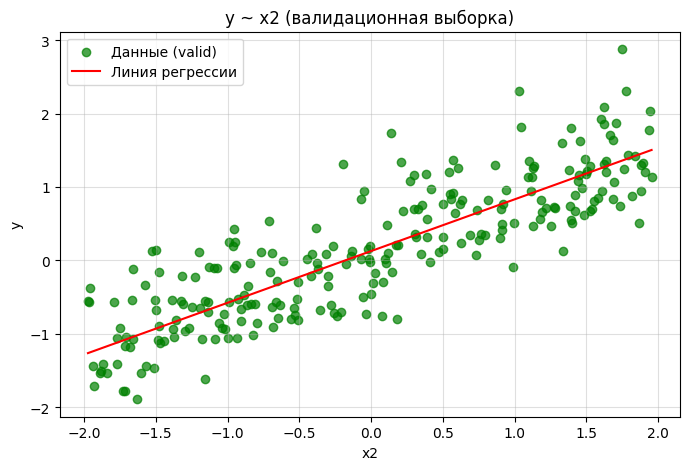

In [ ]:
# Визуализация: scatter + линия регрессии
plt.figure(figsize=(8, 5))
plt.scatter(X_valid, y_valid, color='green', alpha=0.7, label='Данные (valid)')
x_line = np.linspace(X_valid.min(), X_valid.max(), 100)
y_line = a2 * x_line + b2
plt.plot(x_line, y_line, 'r', label='Линия регрессии')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('y ~ x2 (валидационная выборка)')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

На данном графике простой линейной регрессии видно, что данные сконцентрированы вокруг линии регрессии, сама линия находится под углом стремящимся к 45 градусам, что говорит о том, что переменные линейно зависимы

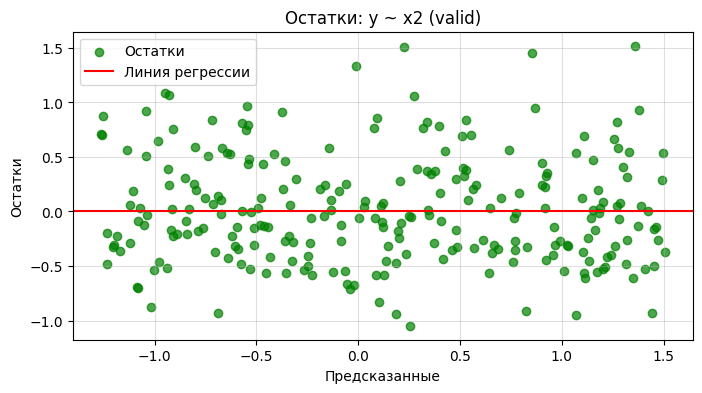

In [ ]:
# График остатков
residuals_x2 = y_valid - pred_x2_valid
plt.figure(figsize=(8, 4))
plt.scatter(pred_x2_valid, residuals_x2, alpha=0.7, color='green',label='Остатки')
plt.axhline(0, color='red', linestyle='-',label='Линия регрессии')
plt.xlabel('Предсказанные')
plt.ylabel('Остатки')
plt.title('Остатки: y ~ x2 (valid)')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

На графике остатков видно, что точки сконцентрированы вокруг красной линии, что говорит о хорошем качестве модели — остатки ведут себя случайно, без систематических зависимостей. Если сравнивать с предыдущим графиком остатков, то здесь распределение остатков выглядит более равномерным и стабильным — модель x2 объясняет зависимость намного лучше

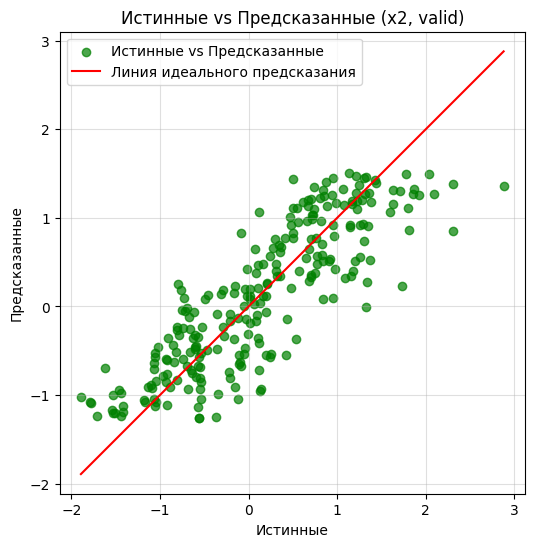

In [ ]:
# График истинные vs предсказанные
plt.figure(figsize=(6, 6))
plt.scatter(y_valid, pred_x2_valid, alpha=0.7, color='green',label='Истинные vs Предсказанные')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r-',label='Линия идеального предсказания')
plt.xlabel('Истинные')
plt.ylabel('Предсказанные')
plt.title('Истинные vs Предсказанные (x2, valid)')
plt.axis('equal')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

Здесь создаётся и отображается график ошибок предсказания. На графике видно, что точки располагаются вдоль красной диагонали, это говорит о линейной связи между x2 и y. Точки в основном группируются вокруг диагонали, но не лежат на ней. Видно, что точки распределены почти симметрично относительно диагонали. Это значит, что модель не систематически переоценивает или недооценивает — ошибки случайны

Часть 2

Поскольку не было выявлено зависимости между x1 и y путем линейной регрессии, то можно попробовать выявить зависимость между этими переменными путем полиномиальной регрессии.

In [ ]:
# Делим на обучающую и валидационную выборки
X = df['x1']
y = df['y']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)
X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

Происходит разделение на обучающую и валидационную выборки с помощью  train_test_split. Размер обучающей выборки составил 75%

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(np.array(X_train).reshape(-1, 1))
X_valid_poly = poly.transform(np.array(X_valid).reshape(-1, 1))
model_poly_2 = LinearRegression()
model_poly_2.fit(X_train_poly, y_train)

LinearRegression()

Происходит обучение модели полиномиальной регрессии второй степени с помощью LinearRegression() и degree = 2

In [ ]:
# 3. Выполняем предсказание
pred_poly_2_valid = model_poly_2.predict(X_valid_poly)

С помощью метода predict выполняется предсказание.

In [ ]:
print(f"MAE: {metrics.mean_absolute_error(y_valid, pred_poly_2_valid):.4f}")
print(f"R²: {metrics.r2_score(y_valid, pred_poly_2_valid):.4f}")

MAE: 0.7636
R²: 0.0372


Подсчитываются метрики качества. MAE и R2. Значение MAE 0.7 - достаточно высокое, R^2 - 0.03 -низкое, что говорит о том, что модель не работает

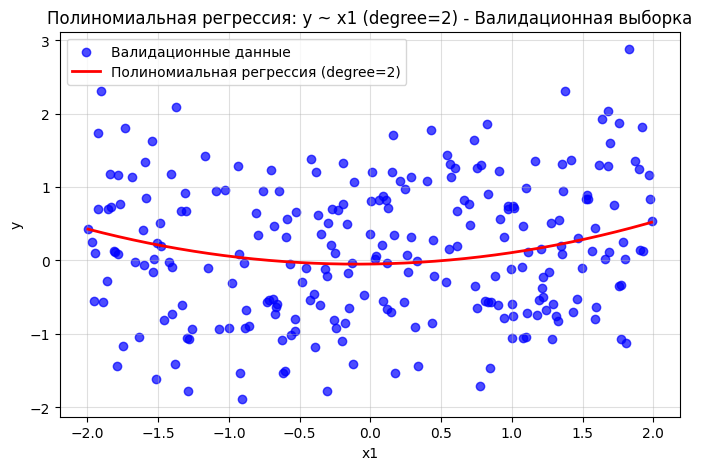

In [ ]:
plt.figure(figsize=(8, 5))

# Точки - только валидационные данные
plt.scatter(X_valid, y_valid, color='blue', alpha=0.7, label='Валидационные данные')

# Гладкая линия регрессии
x_line = np.linspace(X_valid.min(), X_valid.max(), 300).reshape(-1, 1)
x_line_poly = poly.transform(x_line)
y_line = model_poly_2.predict(x_line_poly)

plt.plot(x_line, y_line, 'r-', linewidth=2, label='Полиномиальная регрессия (degree=2)')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Полиномиальная регрессия: y ~ x1 (degree=2) - Валидационная выборка')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

Происходит визуализация полиномиальной регрессии второй степени.Точки хаотично разбросаны по всему графику. Нет явной кривой, параболы или какой-либо формы, которую можно было бы подогнать. Красная линия — это попытка модели найти квадратичную зависимость, но она почти горизонтальна. Даже полином второй степени не смог найти значимую связь между x1 и y. Модель почти не использует x1 для предсказания y — она просто "угадывает" среднее

Теперь аналогично второй степени, выполняем для третьей.

In [ ]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(np.array(X_train).reshape(-1, 1))
X_valid_poly = poly.transform(np.array(X_valid).reshape(-1, 1))

Создаются новые признаки из исходных, возводя их в степени.

In [ ]:
# 2. Обучаем модель
model_poly_3 = LinearRegression()
model_poly_3.fit(X_train_poly, y_train)

# 3. Выполняем предсказание
pred_poly_3_valid = model_poly_3.predict(X_valid_poly)

Происходит обучение модели и предсказание

In [ ]:
# 4. Подсчитываем и выводим метрики качества
print(f"MAE: {metrics.mean_absolute_error(y_valid, pred_poly_3_valid):.4f}")
print(f"R²: {metrics.r2_score(y_valid, pred_poly_3_valid):.4f}")

MAE: 0.7635
R²: 0.0394


Метрики для третьей степени. Значение MAE 0.7 - достаточно высокое, R^2 - 0.03 -низкое, что говорит о том, что модель не работает

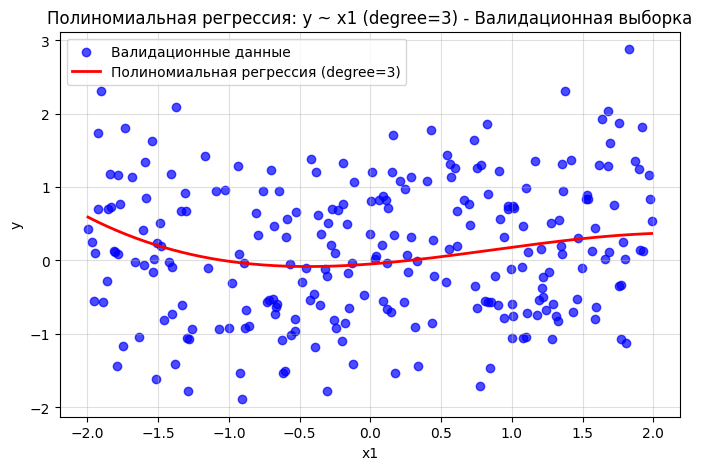

In [ ]:
plt.figure(figsize=(8, 5))
# Точки - только валидационные данные
plt.scatter(X_valid, y_valid, color='blue', alpha=0.7, label='Валидационные данные')

# Гладкая линия регрессии
x_line = np.linspace(X_valid.min(), X_valid.max(), 300).reshape(-1, 1)
x_line_poly = poly.transform(x_line)
y_line = model_poly_3.predict(x_line_poly)

plt.plot(x_line, y_line, 'r-', linewidth=2, label='Полиномиальная регрессия (degree=3)')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Полиномиальная регрессия: y ~ x1 (degree=3) - Валидационная выборка')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

Модель уловила более сложную нелинейную тенденцию. График выглядит почти идентично предыдущему — данные всё ещё хаотичны, без чёткой структуры. Красная линия снова почти горизонтальна, слегка изогнутая — как будто модель пытается подстроиться, но не может найти закономерность. Модель пытается подогнать кубическую параболу, но в данных нет никакой кубической, квадратичной или линейной зависимости. Они просто случайны. Поэтому даже увеличение степени полинома не даёт прироста качества — R² остаётся низким

Часть 3

In [ ]:
# Обработать выбросы. Выполнить визуализацию после обработки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('salary.csv', sep=',')

Saving salary.csv to salary.csv


Производится предварительная обработка данных

In [ ]:
df.head(20)

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842
5,25,11326.768555,3,73.022827,39,4.879219,11916.744037,6431.835876,Bachelor,Los Angeles,IT,Single,No,Yes,49665.609629
6,38,41579.497114,22,87.163120,49,11.706144,33558.588986,12271.330484,PhD,Chicago,Retail,Single,No,Yes,92451.866841
7,56,54713.055994,19,76.671392,38,9.224122,32785.043710,4876.906464,Bachelor,New York,Retail,Single,Yes,Yes,77558.755600
8,36,43636.766522,14,77.635691,72,1.134451,40287.795615,5796.929279,Master,Phoenix,Healthcare,Married,Yes,No,70917.649089
9,40,40306.859573,28,71.729474,58,7.096197,9083.212469,12941.384435,Master,New York,IT,Married,No,No,83196.215231


С помощью метода head() выводятся строки датасета



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


С помощью метода info() происходит отображение информации о датасете, типы данных переменных, колиество строк, занимаемый объем и тд

In [ ]:
print(df.isna().sum())

age                 0
income              0
experience          0
score_test          0
hours_worked        0
distance_to_work    0
savings             0
debt                0
education           0
city                0
job_type            0
marital_status      0
car                 0
remote_work         0
salary              0
dtype: int64


С помощью метода (df.isna().sum()) происходит подсчет пропусков

In [ ]:
df.describe()

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,salary
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,43.732000,50493.562171,19.479333,74.649867,49.046000,10.169171,19920.723043,7656.749308,98573.093521
std,15.071771,15354.495706,11.471529,9.904426,17.053654,10.003094,13635.530107,5481.390395,111786.756001
min,18.000000,-826.421240,0.000000,41.604998,20.000000,0.018137,408.482014,4.367130,28588.984258
25%,31.000000,40525.989722,10.000000,67.776127,34.000000,3.022163,9418.707911,3138.484219,69582.654903
50%,44.000000,50784.690569,19.000000,74.701567,49.000000,7.105165,17114.512522,6786.703775,80310.412797
75%,56.000000,61104.997961,29.000000,81.635633,63.000000,14.392065,27766.214001,11008.309571,91637.052601
max,69.000000,98819.709397,39.000000,107.261317,79.000000,82.597342,101890.570518,27276.705593,985625.114794


С помощью метода describe() можно просматривать числовые значения, минимальное, максимальное, квартили и тд

In [ ]:
columns_to_check=['age',	'income',	'experience',	'score_test','hours_worked',	'distance_to_work',	'savings',	'debt',	'education',	'city',	'job_type','marital_status','car','remote_work','salary']
for x in columns_to_check:
  print(x,":","\n", df[x].unique(),"\n")

age : 
 [56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63] 

income : 
 [70201.18967961 51901.89739521 38605.40929283 ... 52600.1213557
 63187.64452152 47717.00029463] 

experience : 
 [25 39  4 20 13  3 22 19 14 28  7 18 38 27 26 34 36  0  2 23 35 33 30  5
  9  6 37 21 11 12 29 24 15 31  8 16 10  1 17 32] 

score_test : 
 [87.5597292  70.80838058 63.32499641 ... 76.48586229 73.85983885
 61.18992693] 

hours_worked : 
 [62 36 77 33 48 39 49 38 72 58 75 32 37 42 65 52 59 28 51 73 46 25 54 56
 53 44 23 29 43 40 30 35 45 68 26 31 69 55 67 60 21 47 57 22 74 20 64 66
 34 76 50 78 61 71 79 27 41 63 70 24] 

distance_to_work : 
 [ 3.70868989  7.08279284  5.12915445 ...  0.12503437 21.1868508
  0.46136986] 

savings : 
 [25987.33404811 22134.89902125 47106.06840762 ... 23163.37305086
 31465.49301351 46244.00799323] 

debt : 
 [ 2556.82162683   725.1805132  12659.3595826  ... 16976.65676

Производится проверка на неявные дубликаты

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1495,False
1496,False
1497,False
1498,False


С помощью duplicated() производится проверка на явные дубликаты

В качестве целевой переменной была выбрана зарплата - salary

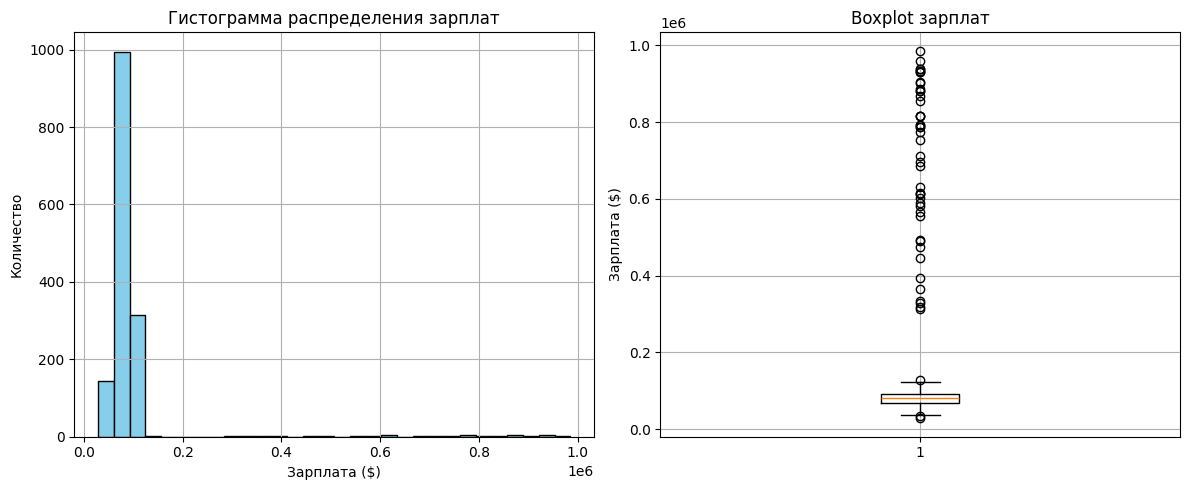

In [ ]:
#Задание 2
import matplotlib.pyplot as plt

# Простая гистограмма
plt.figure(figsize=(12, 5))
# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(df['salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Гистограмма распределения зарплат')
plt.xlabel('Зарплата ($)')
plt.ylabel('Количество')
plt.grid(True)
# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['salary'])
plt.title('Boxplot зарплат')
plt.ylabel('Зарплата ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Отображаем 2 графика, слева гистограмма, на которой отображается зарплата и количество людей, которые получают такую зарплату, а справа Boxplot, где также происходит отображение зарплат.Распределение зарплат крайне смещено влево. Большинство людей получают низкие зарплаты. На ящике с усами медиана находится где-то около 0.1 млн — то есть половина всех людей получает меньше 100 тысяч долларов. Ящик очень мал — это означает, что 50% данных сосредоточенных в узком диапазоне. Есть много выбросов. Они показывают людей с очень высокими зарплатами — от 0.2 млн до 1 млн и выше. Нижний "ус" почти не виден — потому что нижняя граница очень близка к нулю. Boxplot подтверждает, что большинство значений сконцентрированных внизу

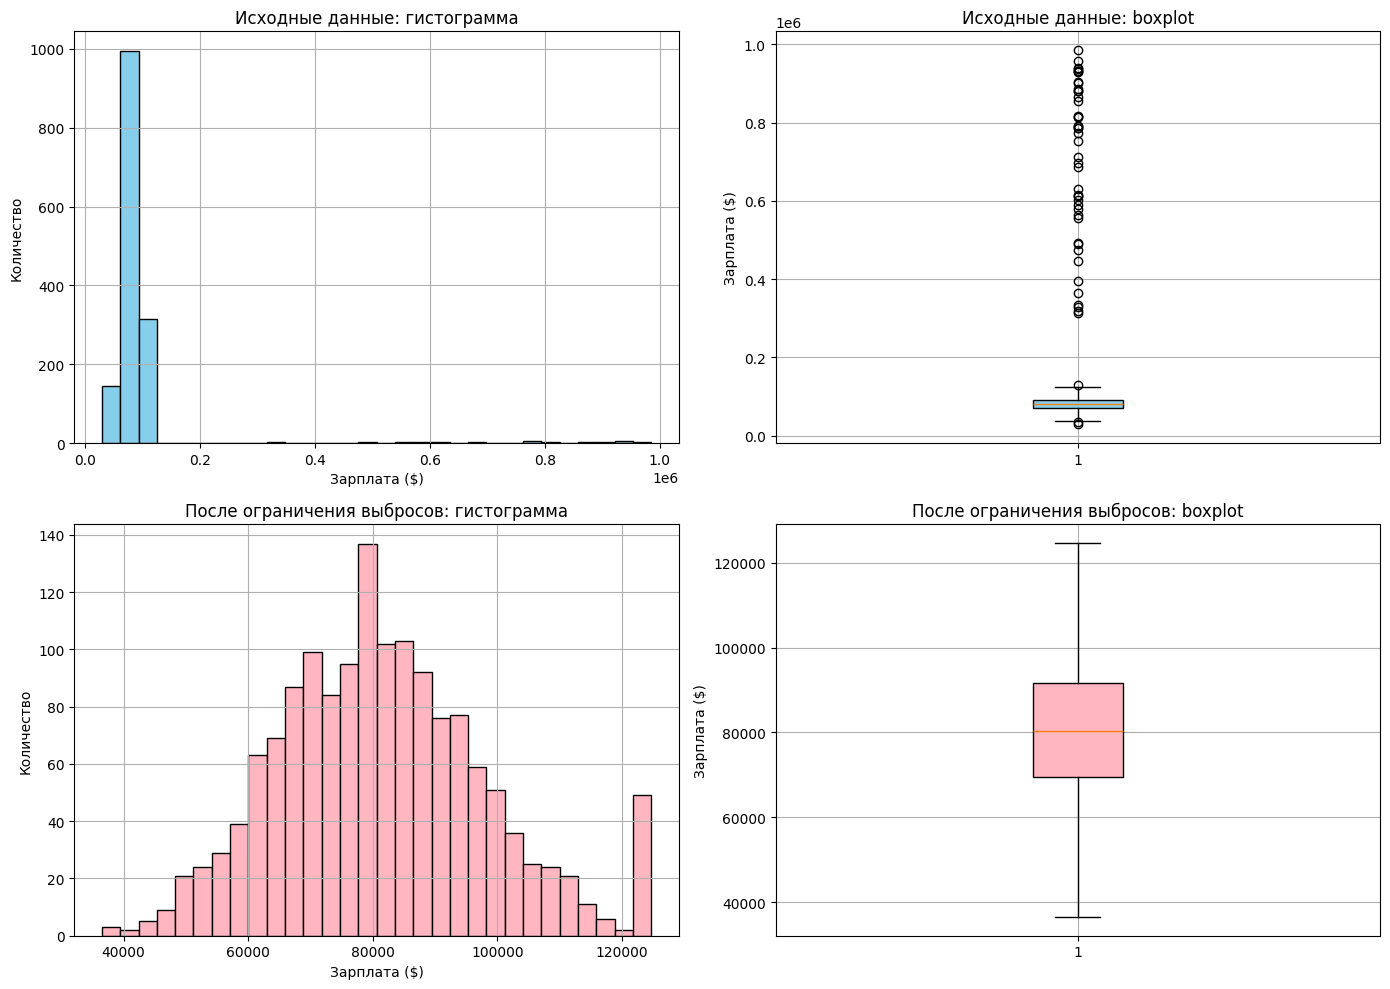

In [ ]:
# Границы по IQR
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Стандартное правило: 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ограничение выбросов (winsorization)
df_capped = df.copy()
df_capped['salary'] = df_capped['salary'].clip(lower=lower_bound, upper=upper_bound)

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Исходная гистограмма
axes[0, 0].hist(df['salary'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Исходные данные: гистограмма')
axes[0, 0].set_xlabel('Зарплата ($)')
axes[0, 0].set_ylabel('Количество')
axes[0, 0].grid(True)

# Исходный boxplot
axes[0, 1].boxplot(df['salary'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[0, 1].set_title('Исходные данные: boxplot')
axes[0, 1].set_ylabel('Зарплата ($)')
axes[0, 1].grid(True)

# Гистограмма после обработки
axes[1, 0].hist(df_capped['salary'], bins=30, color='lightpink', edgecolor='black')
axes[1, 0].set_title('После ограничения выбросов: гистограмма')
axes[1, 0].set_xlabel('Зарплата ($)')
axes[1, 0].set_ylabel('Количество')
axes[1, 0].grid(True)

# boxplot после обработки
axes[1, 1].boxplot(df_capped['salary'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightpink'))
axes[1, 1].set_title('После ограничения выбросов: boxplot')
axes[1, 1].set_ylabel('Зарплата ($)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Поскольку первоначально много выбросов и данные отображаются некорректно, производится обработка от выбросов и отображение уже "чистых" графиков. График показывает, что после обработки выбросов распределение зарплат стало более сбалансированным и приближённым к нормальному.Если зарплата ниже lower_bound,то заменяется на lower_bound. Если зарплата выше upper_bound, то заменяется на upper_bound. Остальные значения остаются без изменений. Это "закрытие" экстремумов. Он сохраняет размер датасета и уменьшает влияние выбросов, не теряя наблюдения. На гистограмме есть пик около 80 000 — это наиболее частая зарплата. Слева — небольшой хвост до 40 000, справа — более длинный хвост до 120 000+. Но нет экстремальных выбросов (например, 500 000 или 1 000 000), которые были бы видны как отдельные высокие столбики на правом краю до преобразования. На графике ящик с усами нет точек за пределами усов, а значит, выбросов нет. Ящик охватывает диапазон примерно от 70 000 до 90 000. Медиана — около 80 000. Усы идут примерно от 40 000 до 120 000 — это границы "нормальных" значений. Данные стали "чище"  и готовы к обучению

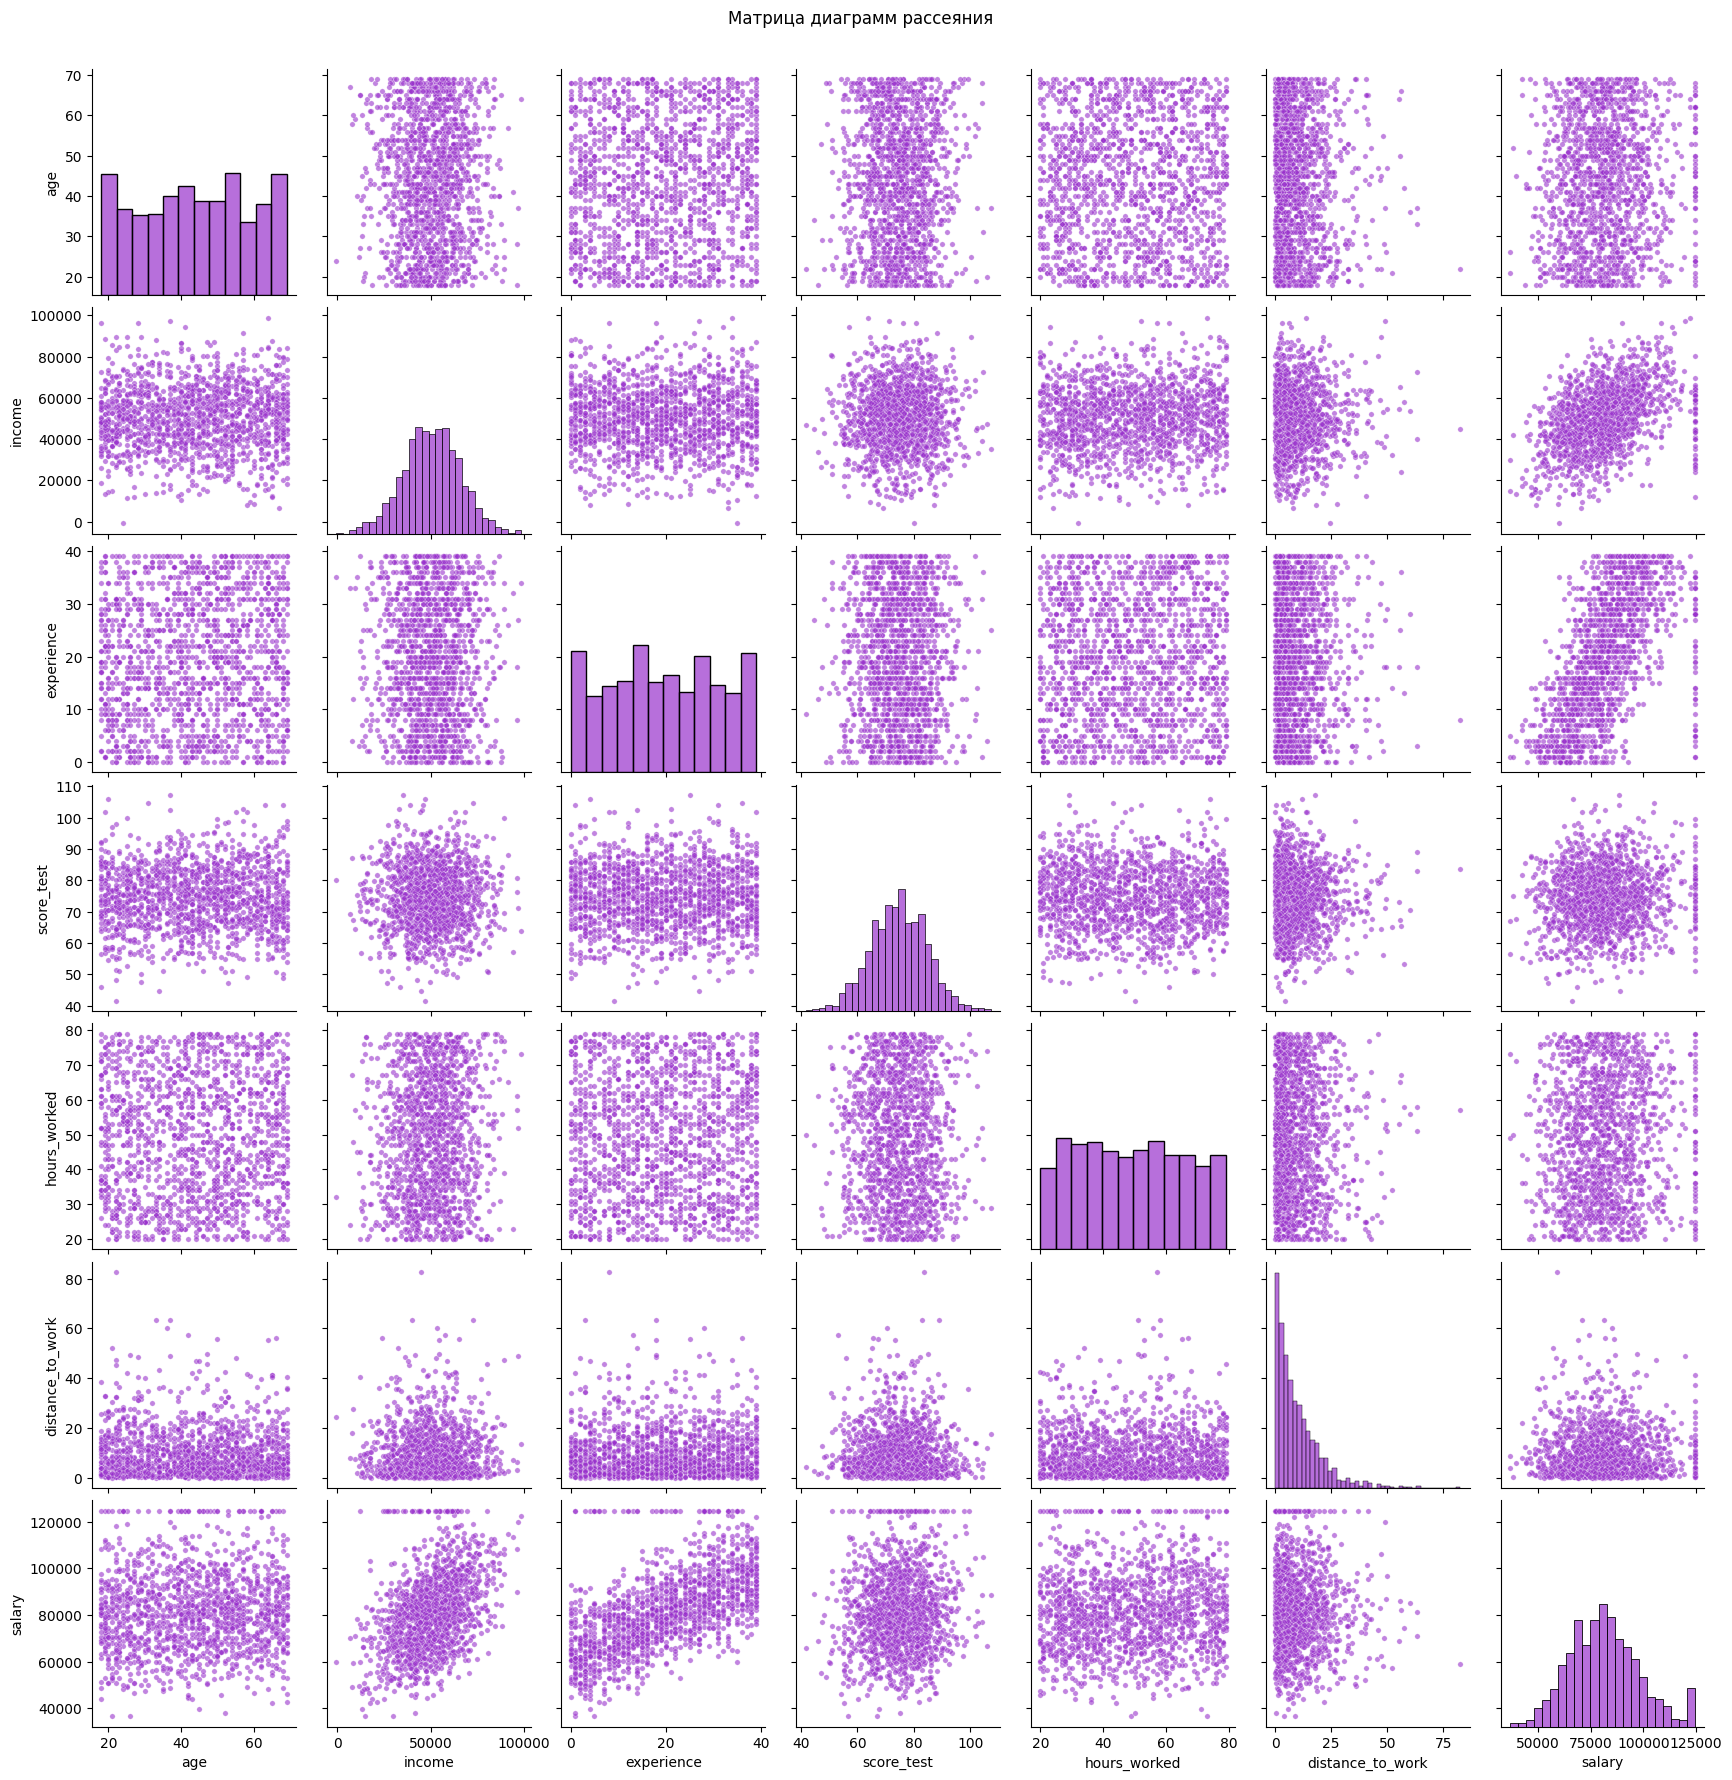

In [ ]:
# Задание 4. Построить матрицу диаграмм рассеяния.
numeric_cols = [
    'age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'salary'
]

sns.pairplot(
    df_capped[numeric_cols],
    diag_kind='hist',
    plot_kws={'color': 'DarkOrchid', 'alpha': 0.6, 's': 15},
    diag_kws={'color': 'DarkOrchid', 'alpha': 0.7}
)
plt.suptitle('Матрица диаграмм рассеяния', y=1.02)
plt.show()

Диагональные ячейки — гистограммы распределения каждой переменной. Вдоль диагонали находятся гистограммы распределения каждой переменной: distance_to_work: смещено влево, большинство людей живут близко к работе (до 20–30 единиц). salary: зарплаты распределены примерно нормально, с пиком около 80–90 тысяч долларов и небольшим смещением вправо. age: большинство людей с возрастом 45 лет. income: в целом, похож на график зарплат, также нормальное распределение.

In [ ]:
#Задание 5. Разделить данные на обучающую и валидационные выборки и произвести кодирование

y = df_capped['salary']

X = df_capped.drop('salary', axis=1)

X_encoded = pd.get_dummies(
    X,
    columns=['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work'],
    drop_first=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)


В данном коде выделяется целевая переменная и признаки. А также разделяются данные на обучающую и валидационную выборки. shuffle=True перемешивает данные перед разделением на обучающую и тестовую выборки.drop_first=True Удаляет первую категорию из каждой группе при one-hot кодировании. Чтобы избежать мультиколлинеарности — ситуации, когда признаки линейно зависят друг от друга

In [ ]:
# Задание 7. Обучить модель линейной регрессии
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Происходит масштабирование признаков обучающей и валидационной выборок корректно. Обучается линейная регрессия на стандартизированных данных. Подготавливает всё для честной оценки модели и сравнения с другими алгоритмами

In [ ]:
# Задание 8. Метрики качества
y_pred = model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

MSE: 114339173.79
MAE: 6543.99
RMSE: 10692.95
R2: 0.6205


R² показывает, насколько хорошо модель объясняет дисперсию целевой переменной по сравнению с моделью, которая всегда предсказывает среднее значение y_train. R^2 = 0.6, результат лежит в промежутке от 0.5 до 1, что является нормальным, MAE =6543.99 - низкое значение - модель работает хорошо

In [ ]:
# 9) Создать датафрейм с истинными и предсказанными значениями. Вывести его.
import pandas as pd

results_df = pd.DataFrame({
    'Истинные значения': y_val,
    'Предсказанные значения': y_pred
})

results_df

,Истинные значения,Предсказанные значения
1116,51903.858260,58704.637256
1368,95326.909439,94088.059577
422,90717.615265,86539.936932
413,84107.847083,83117.495988
451,62854.220757,68559.963759
...,...,...
983,108393.433043,97880.090768
799,68559.692777,71319.645225
1265,97698.158387,90072.116051
1150,81595.796248,72286.875081


Создаётся таблица (DataFrame), в которой сравниваются реальные (истинные) значения целевой переменной и значения, предсказанные моделью машинного обучения. Зачастую происходит завышение, иногда занижение

In [ ]:
# 10) Создать датафрейм с признаками и значением коэффициентов для каждого признака.
coefficients_df = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': model.coef_
})

coefficients_df

,Признак,Коэффициент
0,age,114.763268
1,income,6849.544774
2,experience,10250.379467
3,score_test,1804.129342
4,hours_worked,421.112532
5,distance_to_work,17.619125
6,savings,-270.219964
7,debt,158.132442
8,education_High School,-1856.047538
9,education_Master,2370.039377


Создаётся таблица (DataFrame), в которой сопоставляются названия признаков и их коэффициенты, полученные из обученной линейной модели. Положительный коэффициент означает, что при росте признака целевая переменная растёт. Отрицательный коэффициент - при росте признака целевая переменная падает. Чем больше абсолютное значение коэффициента тем сильнее влияние признака на результат

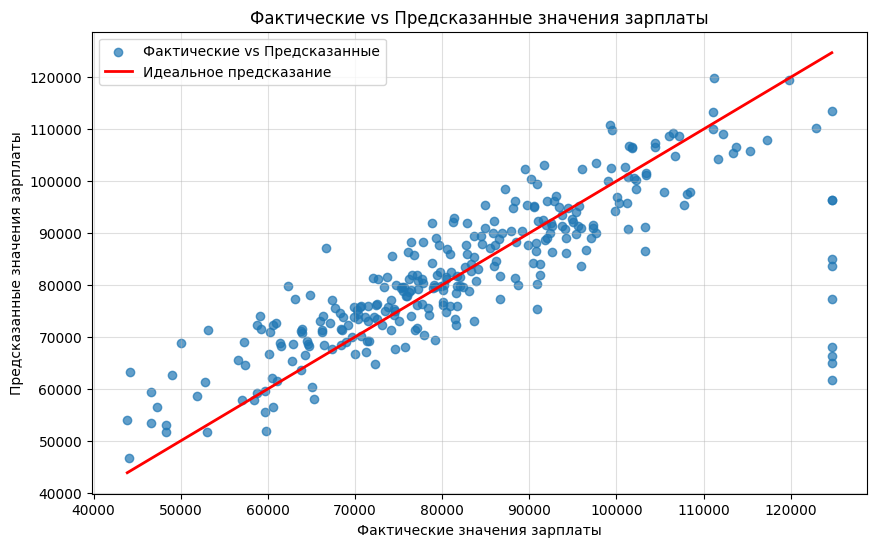

In [ ]:
# 11) Выполнить визуализацию. Отобразить на графике фактическое и предсказанное значение.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Точки: фактические vs предсказанные
plt.scatter(y_val, y_pred, alpha=0.7, label='Фактические vs Предсказанные')
# Диагональная линия идеального предсказания
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r-', lw=2, label='Идеальное предсказание')
plt.xlabel('Фактические значения зарплаты')
plt.ylabel('Предсказанные значения зарплаты')
plt.title('Фактические vs Предсказанные значения зарплаты')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

График «Фактические vs Предсказанные значения» показывает, что модель демонстрирует хорошее качество предсказания: большинство точек расположено вблизи диагональной линии, что свидетельствует о близости предсказаний к реальным значениям. Отсутствие выраженного смещения указывает на отсутствие систематической ошибки модели. Небольшой разброс точек, особенно в области высоких значений зарплат, говорит о наличии случайных ошибок, но не о фундаментальной неверности модели. Таким образом, модель адекватно описывает зависимость между признаками и целевой переменной

In [ ]:
# Задание 12. Обучить KNN
knn_model = KNeighborsRegressor(n_neighbors=20, weights='distance')
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

Реализация метода k-ближайших соседей для задач регрессии — то есть для предсказания непрерывных числовых значений. n_neighbors=20 гиперпараметр, который задаёт, сколько ближайших "соседей" модель будет учитывать при предсказании

In [ ]:
# Предсказание KNN на тестовой выборке
y_pred_knn_val = knn_model.predict(X_val_scaled)

Происходит предсказание с помощью метода predict

In [ ]:
# Задание 13. Метрики и визуализация для KNN
mse_knn = mean_squared_error(y_val, y_pred_knn_val)
mae_knn = mean_absolute_error(y_val, y_pred_knn_val)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_val, y_pred_knn_val)

print(f"MSE: {mse_knn:.2f}")
print(f"MAE: {mae_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R2: {r2_knn:.4f}")

MSE: 194193404.20
MAE: 10335.34
RMSE: 13935.33
R2: 0.3555


Выводятся метрики качества, R^2=0.3, низкий показатель. KNN работает хуже, чем линейная регрессия

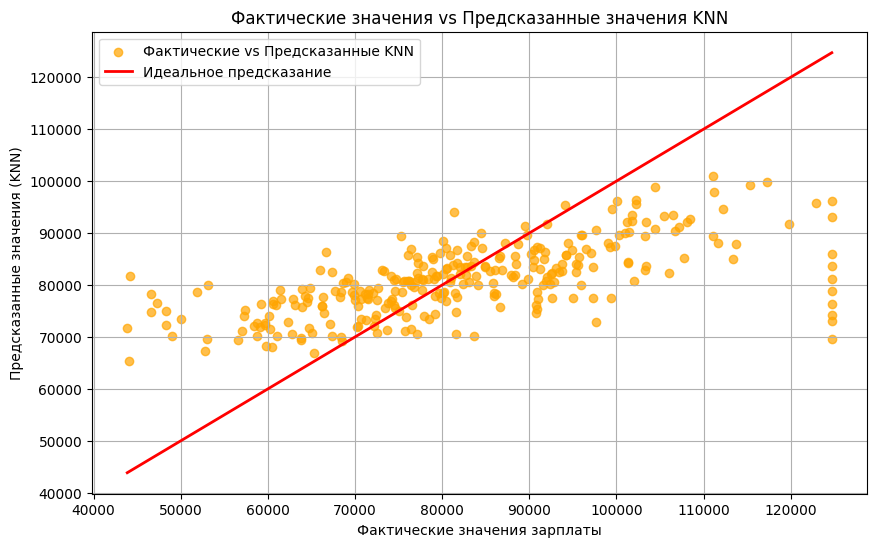

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_val, y_pred_knn_val, alpha=0.7, color='orange',label='Фактические vs Предсказанные KNN')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r', lw=2, label='Идеальное предсказание')
plt.xlabel('Фактические значения зарплаты')
plt.ylabel('Предсказанные значения (KNN)')
plt.title('Фактические значения vs Предсказанные значения KNN')
plt.legend()
plt.grid(True)
plt.show()

Точки расположены близко к красной диагонали. Это говорит о том, что модель KNN неплохо предсказывает зарплаты. В среднем, предсказания не сильно отклоняются от реальных значений. Есть заметный разброс вокруг линии, ошибки есть, но они случайны, а не систематичны. Нет «облака» выше или ниже линии, т.е нет смещения. Точки не образуют кривую, а значит нет признаков нелинейности, которую модель не уловила. В области высоких зарплат (например, > 100 000) точки немного рассыпаются. Модель хуже работает на экстремальных значениях. Это часто происходит в KNN, потому что: в районе редких значений мало соседей, Или соседи могут быть не очень похожими.

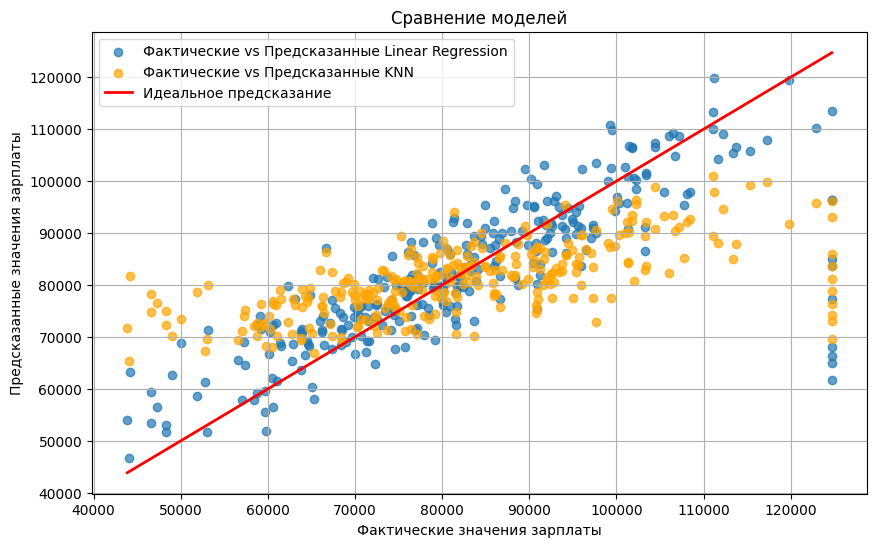

In [ ]:
# Совместная визуализация обеих моделей на тесте
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.7, label='Фактические vs Предсказанные Linear Regression')
plt.scatter(y_val, y_pred_knn_val, alpha=0.7, color='orange', label='Фактические vs Предсказанные KNN')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r', lw=2, label='Идеальное предсказание')
plt.xlabel('Фактические значения зарплаты')
plt.ylabel('Предсказанные значения зарплаты')
plt.title('Сравнение моделей')
plt.legend()
plt.grid(True)
plt.show()

На данном графике представлены представлены KNN и линейная регрессия. По графику видно, что линейная регрессия лучше предсказывает данные. Точки стелятся прям по красной линии, отклонений от прямой мало, в то время как KNN более отклоняется от прямой.

В ходе выполнения данной лабораторной работы были изучены регрессия, способы обучения модели, предсказание, метрики качества,  валидационная и обучающая выборки и виды регрессий. В части 1 модель была обучена несколькими способами – на x1 и y, а также на  x2 и y. Было выявлено, что модель, обученная на x2 и y, имеет линейную зависимость между признаками и целевой переменной. Зависимости между x1 и y выявлено не было. В части 2, поскольку между x1 и y зависимости выявлено не было, была проверена работа полиномиальной регрессии второй и третий степени, но зависимости также выделить не удалось. В третий части лабораторной работы данные были предварительно проверены на наличие пропусков и дубликатов, а затем произведено обучение модели и предсказание данных. Были обработаны выбросы. Была реализована регрессия методом k-ближайших соседей. А также было произведено сравнение на графике линейной регрессии и метода k-ближайших соседей.
Созданная функция model_train_test позволяет эффективно и единообразно оценивать качество различных моделей машинного обучения. Она автоматически выполняет обучение, вычисляет ключевые метрики (MSE, MAE, R²) и предоставляет наглядную таблицу с истинными и предсказанными значениями, что упрощает анализ ошибок и интерпретацию результатов.
Модель k-ближайших соседей была применена для прогнозирования зарплаты на основе доступных признаков. Первоначально модель была обучена с использованием  выбранных параметров: n_neighbors=20 и weights='distance'. Затем с помощью метода GridSearchCV были автоматически подобраны оптимальные гиперпараметры по сетке значений n_neighbors, weights и p (метрики расстояния), с использованием 5-кратной кросс-валидации. Тем не менее, результат оказался чуть хуже исходного.

Дополнительное задание

Задание №11
Написать функцию
model_train_test(X_train, y_train, X_test, y_test, model) , которая будет выполнять
обучение и тестирование модели на обучающей и тестовой выборке. В model -
указывается название модели. Функция должна выводить минимум 3 метрики и
таблицу с предсказанными, истинными значениями и разницей между ними.

In [ ]:
#11 Задание
def model_train_test(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")

    y_true_reset = pd.Series(y_test).reset_index(drop=True)
    y_pred_reset = pd.Series(y_pred).reset_index(drop=True)

    results_df = pd.DataFrame({
        'Истинные значения': y_true_reset,
        'Предсказанные значения': y_pred_reset,
        'Разница': y_true_reset - y_pred_reset
    })

    print(results_df.head())

    return results_df

Создана функция, которая выполняет обучение и тестирование модели на соответствующих данных. А также проиводится вывод трех метрик качества(MSE,MAE,R^2) и таблицы с предсказанными, истинными значениями и разницей между ними.

In [ ]:
# Создаём новую модель
model_final = LinearRegression()

# Вызываем функцию
results = model_train_test(
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_val_scaled,
    y_test=y_val,
    model=model_final
)

MSE: 114339173.7884
MAE: 6543.9891
R2: 0.6205
   Истинные значения  Предсказанные значения      Разница
0       51903.858260            58704.637256 -6800.778996
1       95326.909439            94088.059577  1238.849861
2       90717.615265            86539.936932  4177.678333
3       84107.847083            83117.495988   990.351095
4       62854.220757            68559.963759 -5705.743002


Создается новая модель для обучения и вызывается функця с параметрами X_train_scaled,y_train,X_val_scaled,y_val,model, где model=model_final - объект модели, который будет обучен и протестирован
Судя по метрикам качества результат R^2 = 0.6, что говорит о том, что модель объясняет изменчивость целевой переменной на 60%

Задание №6
Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN.
Сравнить качество модели для подобранных параметров и любых других

In [ ]:
#Задание 6
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Определяем сетку параметров
param_grid = {
    'n_neighbors': range(3, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Создаём KNN без предустановленных параметров
knn = KNeighborsRegressor()

# GridSearchCV с кросс-валидацией
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
)

# Запуск поиска
grid_search.fit(X_train_scaled, y_train)

# Лучшая модель и параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший отрицательный MSE:", grid_search.best_score_)

Лучшие параметры: {'n_neighbors': 19, 'p': 2, 'weights': 'distance'}
Лучший отрицательный MSE: -172682403.49052206


GridSearchCV — инструмент для перебора заданной сетки гиперпараметров с оценкой качества каждой комбинации с помощью кросс-валидации.
Метрика качества: отрицательное среднее квадратичное отклонение (neg_mean_squared_error), что эквивалентно минимизации MSE. Для повышения качества модели регрессии на основе метода k-ближайших соседей был выполнен автоматический подбор оптимальных гиперпараметров с использованием кросс-валидации и полного перебора (Grid Search).
В ходе подбора были рассмотрены следующие параметры: n_neighbors - был выбран диапазон: от 3 до 30. weights — способ взвешивания вклада соседей: 'uniform' — все соседи имеют равный вес, 'distance' — ближайшие соседи важнее.
p = 1 — манхэттенское расстояние,
p = 2 — евклидово расстояние.
Обучаем её на части обучающих данных. Проверяем, насколько хорошо она предсказывает на другой части (кросс-валидация, 5 раз) и выбираем ту, что в среднем даёт наименьшую ошибку. Оптимизация производится по отрицательному MSE, так как GridSearchCV выполняет максимизацию целевой функции.

In [ ]:
# Лучшая модель из GridSearchCV
best_knn = grid_search.best_estimator_

# Предсказания на валидационной выборке
y_pred_knn_best = best_knn.predict(X_val_scaled)

# Метрики для оптимальной модели
mse_best = mean_squared_error(y_val, y_pred_knn_best)
mae_best = mean_absolute_error(y_val, y_pred_knn_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_val, y_pred_knn_best)

print("\nОптимальная KNN модель после GridSearchCV")
print(f"MSE: {mse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R2: {r2_best:.4f}")


Оптимальная KNN модель после GridSearchCV
MSE: 194666163.23
MAE: 10382.15
RMSE: 13952.28
R2: 0.3539


Метрики качества оптимизированной модели

In [ ]:
print("СРАВНЕНИЕ МОДЕЛЕЙ KNN")
print(f"{'Модель':<30} {'MSE':<10} {'MAE':<10} {'R2':<10}")
print(f"{'Базовая (n=20)':<30} {mse_knn:<10.2f} {mae_knn:<10.2f} {r2_knn:<10.4f}")
print(f"{'Оптимизированная':<30} {mse_best:<10.2f} {mae_best:<10.2f} {r2_best:<10.4f}")

СРАВНЕНИЕ МОДЕЛЕЙ KNN
Модель                         MSE        MAE        R2        
Базовая (n=20)                 194193404.20 10335.34   0.3555    
Оптимизированная               194666163.23 10382.15   0.3539    


Таким образом, исходная модель показала чуть более точный результат, чем оптимизированная.